In [1]:
'''
Logistic Model for Predicting Late E-Commerce Deliveries (Part 1)
This model identifies which deliveries from an online retailer will be late so the retailer can remedy the issues accordingly.
#Part 3 trains and tests the model and outputs scoring metrics.
Author: Bilal Kudaimi
Date: 2021-06-05
'''


#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None) 
warnings.filterwarnings('ignore')

In [2]:
#Importing the movie dataframe
movie_df = pd.read_csv('movie_metadata.csv')
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
#Getting the shape, columns, and number of missing values of the dataframe
print('Columns of the movie dataframe: \n {} \n'.format(movie_df.columns))
print('Shape of the movie dataframe: {} \n'.format(movie_df.shape))
print('Number of missing values in each column: \n {}'.format(movie_df.isnull().sum()))

Columns of the movie dataframe: 
 Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object') 

Shape of the movie dataframe: (5043, 28) 

Number of missing values in each column: 
 color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884


In [4]:
#Cleaning the data frame by dropping all rows with NA values 
#This can be done as there is enough data to work with
movie_df = movie_df.dropna()

In [5]:
#Viewing the new shape of the data frame and confirming there are no NA values left
print('New dataframe shape: {} \n'.format(movie_df.shape))
print('New number of NA values: \n{}'.format(movie_df.isnull().sum()))

New dataframe shape: (3756, 28) 

New number of NA values: 
color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64


In [6]:
#Dropping any duplicate rows
movie_df.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


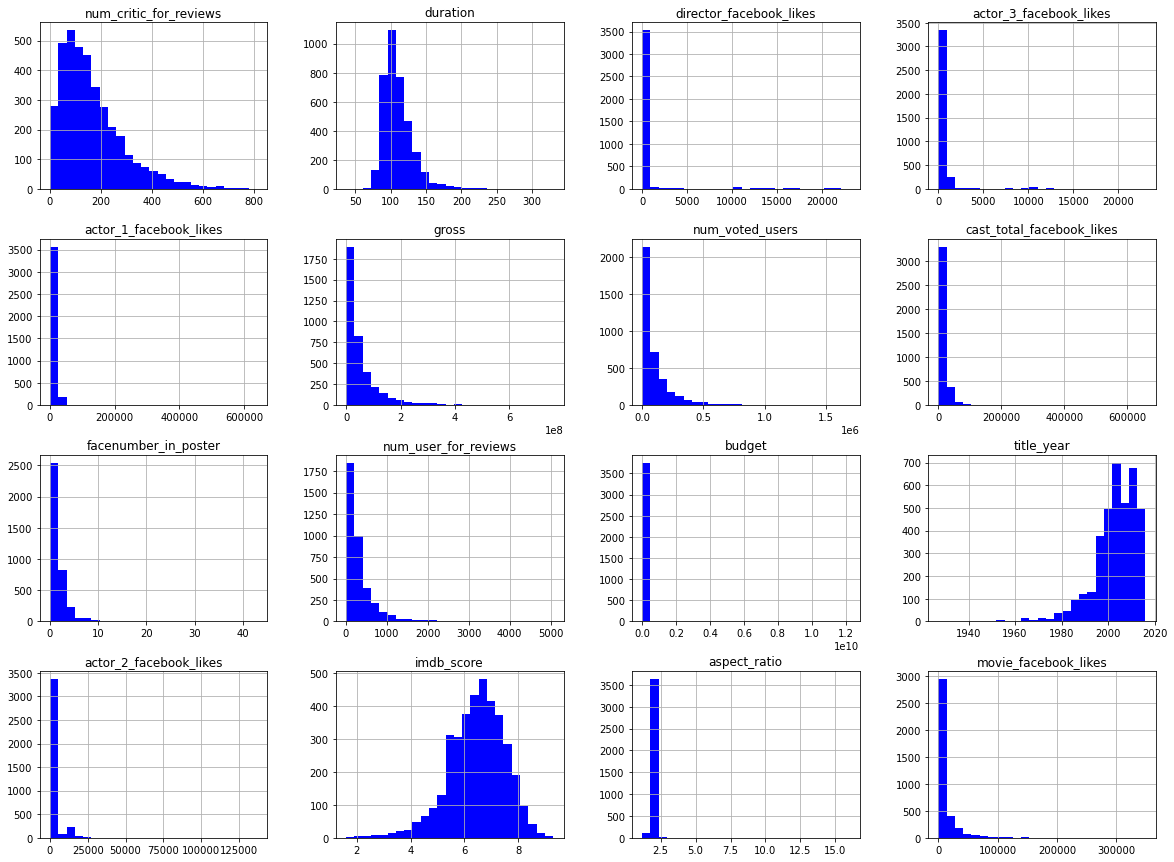

In [7]:
#Generating a histogram of the numerical variables
movie_df.hist(bins = 25, figsize = (20, 15), color = 'b')
plt.show()

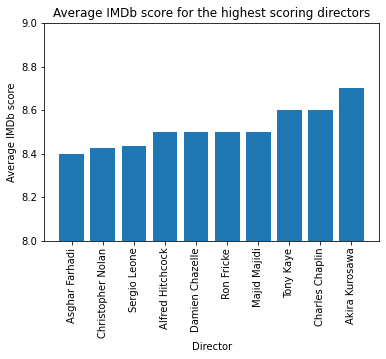

In [8]:
#Plotting the average IMDb score for films of the top 10 highest scoring directors
directors = movie_df.groupby('director_name').mean().sort_values(by = 'imdb_score').tail(10).index
avg_imdb_score = movie_df.groupby('director_name').mean().sort_values(by = 'imdb_score').tail(10)['imdb_score']

#Displaying the graph with the y axis zoomed in to between 8-9 to better illustrate the differences between directors
plt.bar(directors, avg_imdb_score)
plt.xlabel('Director')
plt.ylabel('Average IMDb score')
plt.title('Average IMDb score for the highest scoring directors')
plt.xticks(rotation = 90)
plt.ylim([8, 9])
plt.show()

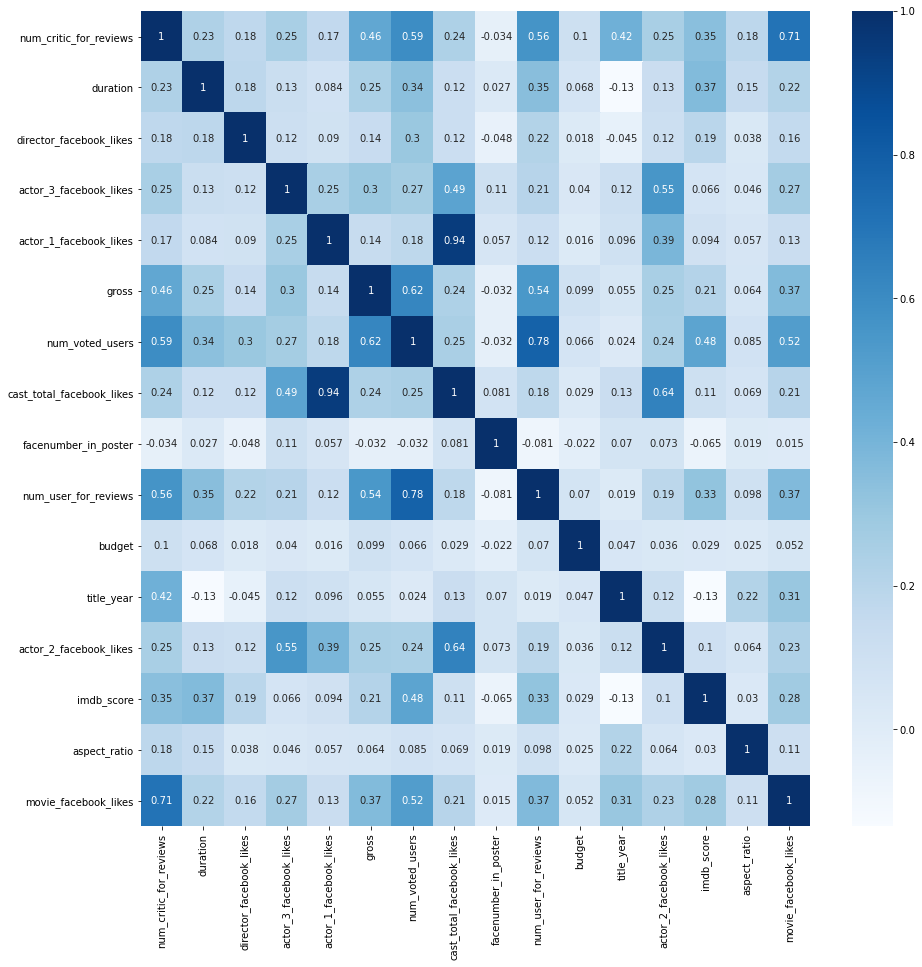

In [9]:
#Generating a correlation heatmap to determine if there are any correlations between the movie features
corr = movie_df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot = True, cmap = "Blues")
plt.show()

In [10]:
#Getting the primary genre of movies with multiple genre categories
movie_df['single_genre'] = movie_df['genres'].apply(lambda x: x.split('|')[0])

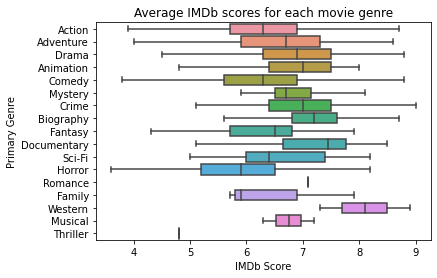

In [11]:
#Finding out which movie genres have the best IMDb score
sns.boxplot(x = 'imdb_score', y = 'single_genre', data = movie_df, showfliers = False)
plt.xlabel('IMDb Score')
plt.ylabel('Primary Genre')
plt.title('Average IMDb scores for each movie genre')
plt.show()

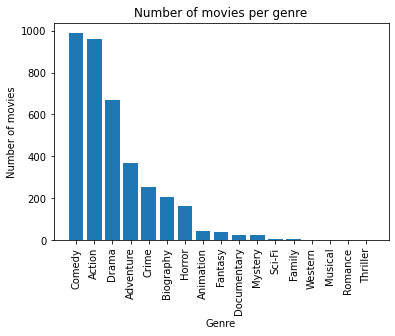

In [12]:
#Finding the most popular genre based on number of movies per genre
plt.bar(movie_df['single_genre'].value_counts().index, movie_df['single_genre'].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Number of movies per genre')
plt.show()

In [13]:
#Splitting the data into training and testing datasets
X = movie_df.drop([i for i in movie_df.columns if movie_df[i].dtype == 'O'], axis = 1)
y = movie_df['imdb_score']

#Further selecting key features based on which features have the least correlations in the above matrix
#It is important to remove any highly correlated features to avoid introducing biases
X = X[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'num_user_for_reviews', 'budget']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shapes of the training data: {}, {}'.format(X_train.shape, y_train.shape))
print('Shapes of the testing data: {}, {}'.format(X_test.shape, y_test.shape))

Shapes of the training data: (3004, 5), (3004,)
Shapes of the testing data: (752, 5), (752,)


In [14]:
#Training the random forest model on the data
randforest = RandomForestRegressor()
randforest.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
#Generating predictions and calculating the MSE and MAE for the random forest model
y_pred = randforest.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = math.sqrt(MSE)

MSE = round(MSE, 2) 
MAE = round(MAE, 2)
RMSE = round(RMSE, 2)
print('Mean squared error of the random forest model: {}'.format(MSE))
print('Root mean squared error of the random forest model: {}'.format(RMSE))
print('Mean absolute error of the random forest model: {}'.format(MAE))

#All the error values were <1, indicating the model outputs IMDb ratings close to what films' actual ratings will be

Mean squared error of the random forest model: 0.66
Root mean squared error of the random forest model: 0.81
Mean absolute error of the random forest model: 0.61
